# Modelo predictivo para el caso de Infidelidades

Alonso Jesus Aguirre Tobar

## Informacion

Se pretende hacer un analisis de casos de infidelidades para saber que factores son los que influyen en el comportamiento de un grupo de personas, se pretende usar algun metodo para predecir que porcentaje de personas son propensas a ser infieles. Tener en claro que son aproximadamente 600 personas, por lo que la muestra no puede extrapolar mas que a un sector local de la poblacion donde se tomo la muestra.

## DataSet

El data set fue otorgado por un reclutador para evaluar la capacidad de analisis de un problema, dando una base de datos en formato CSV.
Descripción de Variables:

Infidelidades
Numérico. Cuántas relaciones sexuales extramaritales ha tenido el año anterior?

Genero
Factor. Indica el sexo de la persona

Edad
Variable Numérica codificada: 17.5 = bajo 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 o más.

Años casado
Variable Numérica codificada: 0.125 = 3 meses o menos, 0.417 = 4–6 meses, 0.75 = 6 meses–1 año, 1.5 = 1–2 años, 4 = 3–5 años, 7 = 6–8 años, 10 = 9–11 años, 15 = 12 o más años.

Hijos del matrimonio
Factor. Hay niños nacidos en el matrimonio?

Religiosidad
Variable Numérica codificada: 1 = nada, 2 = poco, 3 = indiferente, 4 = algo, 5 = muy.

Educación
Variable Numérica codificada: 9 =básica, 12 = media, 14 =Superior Incompleto, 16 y 17 = Superior, 18 = Magister, 20 = Doctorado o Postdoctorado.

Ocupación
Númerica Ocupación en relación a la clasificación de Hollingshead.

Calidad del Matrimonio

Variable Numérica codificada: 1 = muy infeliz, 2 = infeliz, 3 = medianamente, 4 = más feliz que la media, 5 = muy feliz.



## Importar librerias requeridas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

sns.set(color_codes=True)

## Lectura del DataSet

In [2]:
df = pd.read_csv('lista.csv')

## Exploracion de datos

El primer paso que haremos es dropear la columna de 'ID', puesto que no nos proporciona un relacion con las demas features.

In [3]:
df = df.drop(columns='ID')

El siguiente paso sera tener una lectura normalizada de los datos, en el caso de las Infidelidades nos dan la cantidad de veces que una persona fue infiel, lo que nos interesa en este caso es que si fue o no fue infiel, por lo que reemplazamos los valores mayores a 0 por 1. En el caso de las columnas Genero e Hijos del matrimonio se leen como string, como necesitamos correlacionarlos asignamos hombre=0, mujer=1 y no=0, si=1 para tener una correlacion correcta usando el metodo pearson. Queremos acotar ademas que se tuvo que modificar el archivo excel (formato CSV) puesto que se manejan los decimales con coma, reemplazamos cada coma por un punto. Ademas eliminamos caracteres que tengan conflicto con acsii (problemas con caracteres).

In [4]:
df2 = df[df.ix[:,0]>1]
#print(df2['Infidelidades'].head())
df['Infidelidades'] = df['Infidelidades'].replace(df2['Infidelidades'], 1)
df['Genero'] = df['Genero'].replace('hombre', 0)
df['Genero'] = df['Genero'].replace('mujer', 1)
df['Hijos del matrimonio'] = df['Hijos del matrimonio'].replace('no', 0)
df['Hijos del matrimonio'] = df['Hijos del matrimonio'].replace('si', 1)


/home/dahaka/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Aplicamos la correlacion dejando el color mas claro implicando una mejor correlacion.

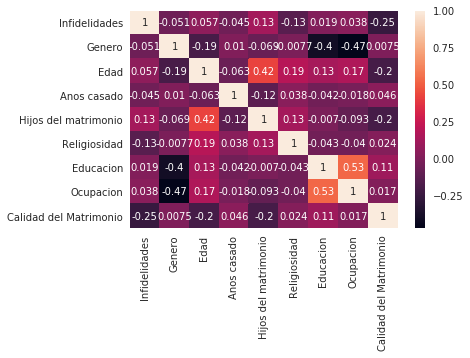

In [5]:
co = df.corr()
sns.heatmap(co, annot=True)

En la tabla de correlacion de mas arriba nos enfocaremos principalmente en las infidelidades puesto que ademas nos da informacion de correlaciones entre features (como ejemplo claro la mejor correlacion es que las personas con mas educacion tienen un nivel de ocupacion superior).
Tambien notamos correlaciones negativas, esto significa que si una caracteristica aumenta la otra por consiguiente deberia disminuir (como ejemplo la mayor es la ocupacion, significa que a mayor nivel de ocupacion el genero tiende a cero, ya que es solo 0 y 1, esto quiere decir que el hombre que representa a 0 tiene mayor nivel de ocupacion).
Centrandonos en las infidelidades la mejor correlacion tiene que ver con los cijos del matrimonio, significa que aumenta la infidelidad cuando si hay hijos dentro del matrimonio. Por otro lado el factor mas negativo es a calidad del matrimonio lo que implica que cuando aumenta la cantidad de infidelidades se representa por una menor calidad del matrimonio.

Como todas las caracteristicas son importantes se graficara cada feature en contraste con la tasa de infidelidad para determinar la cantidad de personas que son o no infieles. 

Se grafica un scatter para tener en cuenta que se puede usar una funcion sigmoide para algoritmos de Machine LEarning

Text(0,0.5,u'Infidelidades')

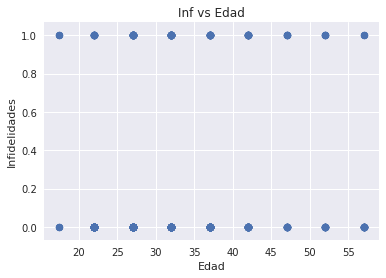

In [6]:
fig = plt.figure() #crea un objeto de figura
ax = fig.add_subplot(1,1,1) #adhiere una o mas subplot
ax.scatter(df['Edad'],df['Infidelidades'])
plt.title('Inf vs Edad')
plt.xlabel('Edad')
plt.ylabel('Infidelidades')


/home/dahaka/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


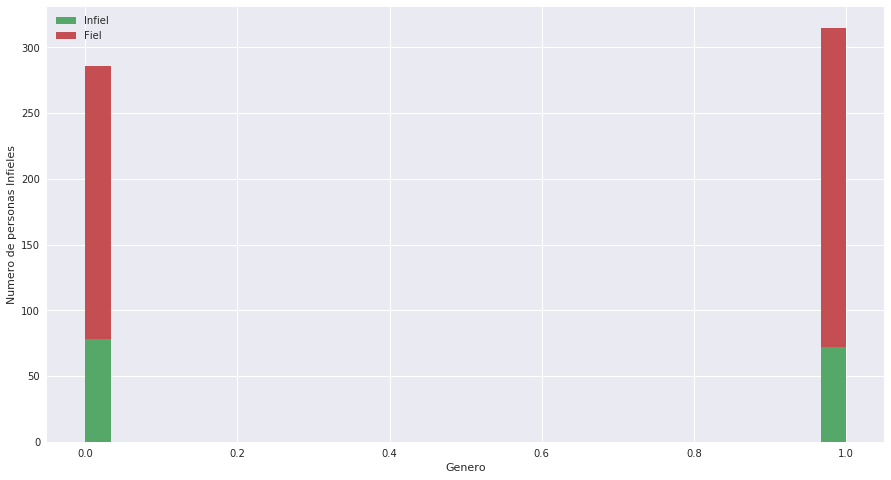

In [7]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Genero'],df[df['Infidelidades']==0]['Genero']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Genero')
plt.ylabel('Numero de personas Infieles')
plt.legend()


Se aprecia que a pesar de que hay mas mujeres en la muestra, la cantidad de hombres infieles es mayor, por lo que se puede determinar que con respecto a nuestra muestra los hombres son mas infieles que las mujeres.

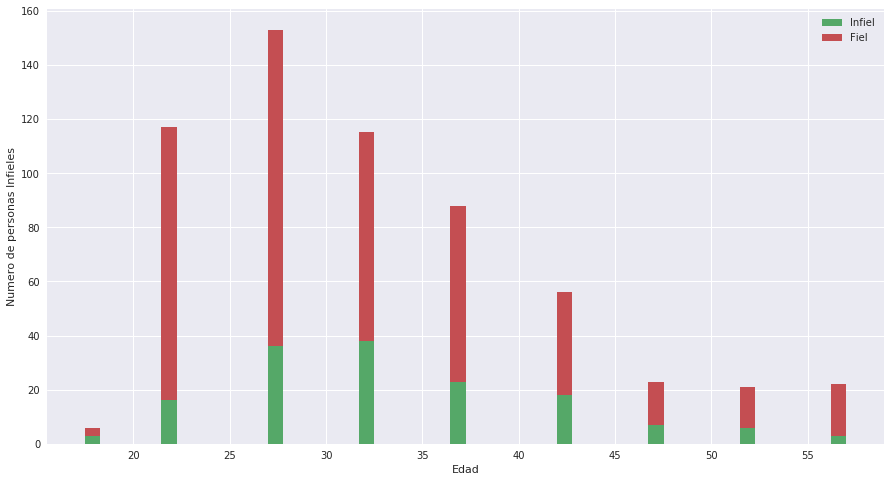

In [8]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Edad'], df[df['Infidelidades']==0]['Edad']], stacked=True,
         color = ['g','r'],bins = 50,label = ['Infiel','Fiel'])
plt.xlabel('Edad')
plt.ylabel('Numero de personas Infieles')
plt.legend()

En este grafico es dificil comparar, sin embargo la mayor cantidad de personas infieles se concentrarn entre los 27 y 33 anos de edad aproximadamente.

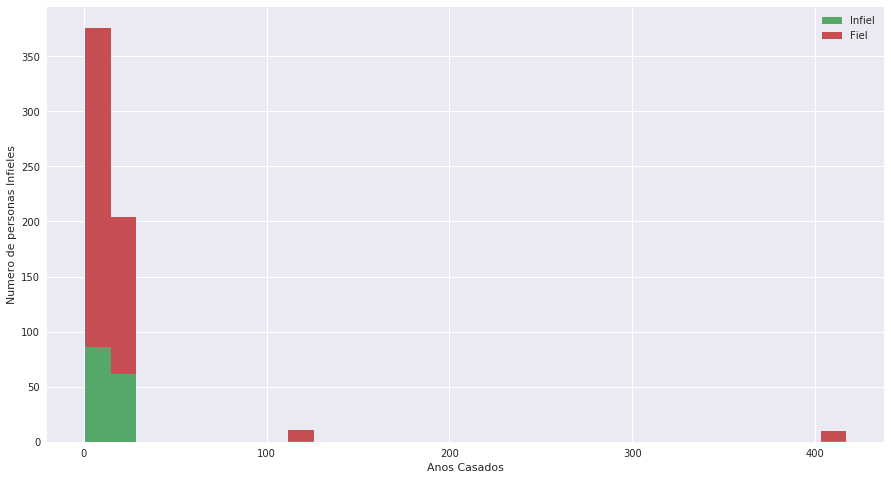

In [9]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Anos casado'],df[df['Infidelidades']==0]['Anos casado']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Anos Casados')
plt.ylabel('Numero de personas Infieles')
plt.legend()

En el grafico de mas arriba deja en claro que con menos anos de casado mayor es la probabilidad de que una persona sea infiel.

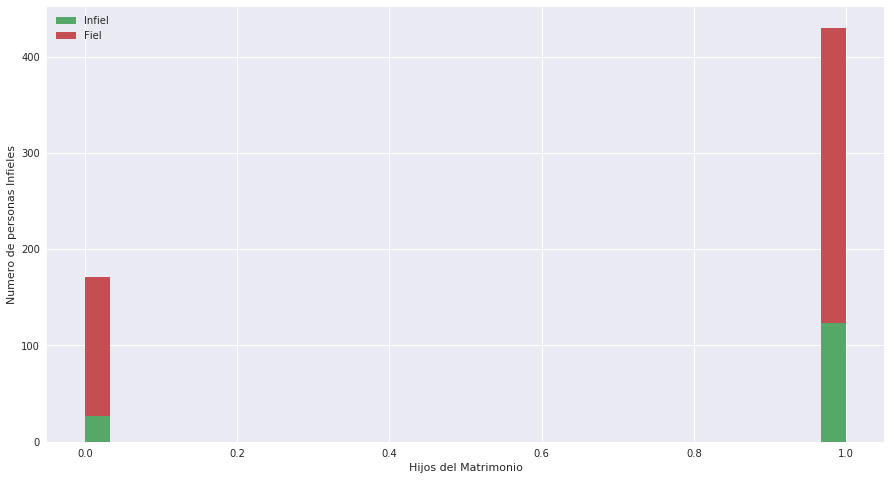

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Hijos del matrimonio'],df[df['Infidelidades']==0]['Hijos del matrimonio']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Hijos del Matrimonio')
plt.ylabel('Numero de personas Infieles')
plt.legend()

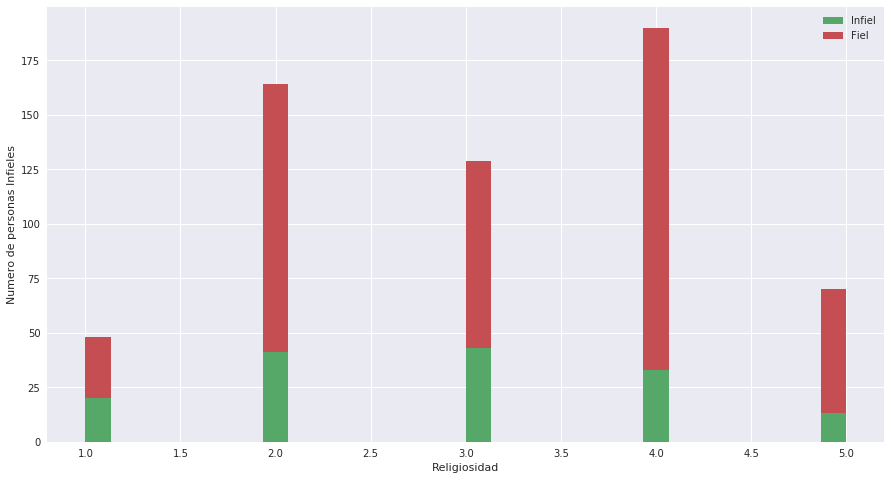

In [11]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Religiosidad'],df[df['Infidelidades']==0]['Religiosidad']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Religiosidad')
plt.ylabel('Numero de personas Infieles')
plt.legend()

En el grafico de arriba se aprecia que la concentracion de personas infieles esta dentro de una Religiosidad baja y media.

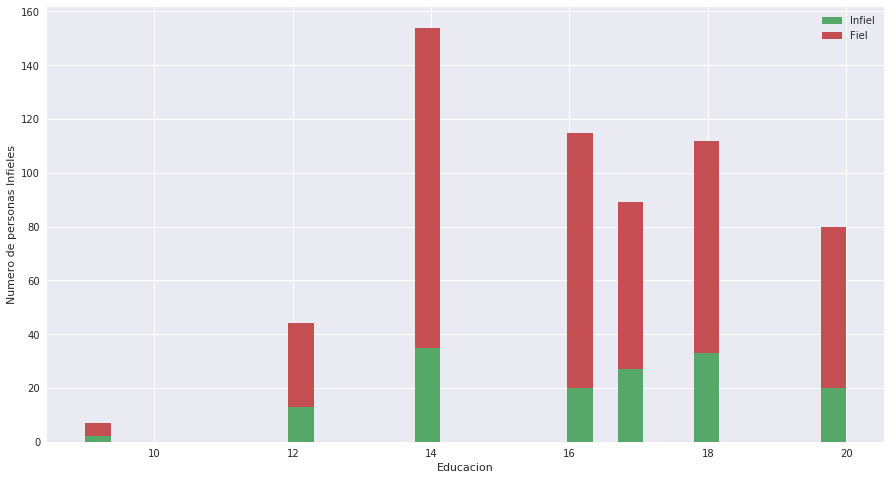

In [12]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Educacion'],df[df['Infidelidades']==0]['Educacion']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Educacion')
plt.ylabel('Numero de personas Infieles')
plt.legend()

En el grafico de arriba se muestra que las personas infieles se concentran en en personas de estudio superior incompleto, completo y magister.

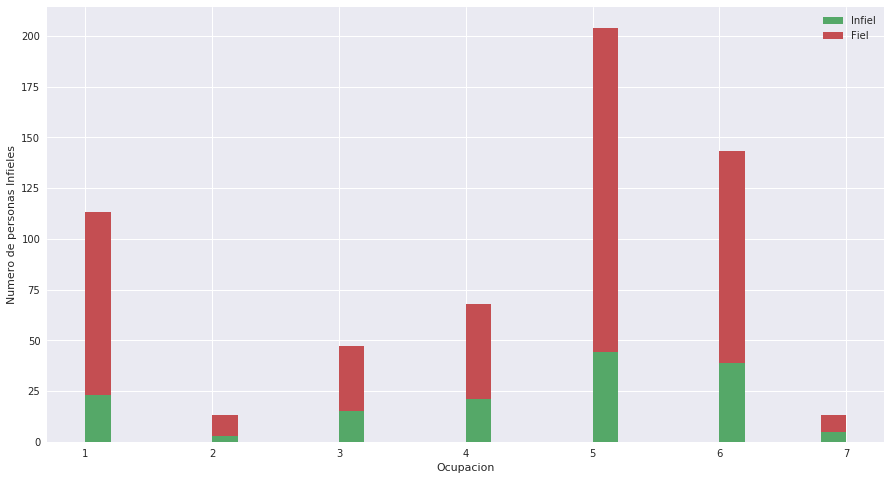

In [13]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Ocupacion'],df[df['Infidelidades']==0]['Ocupacion']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Ocupacion')
plt.ylabel('Numero de personas Infieles')
plt.legend()

Con respecto a la ocupacion se ve que la concentracion de personas infieles esta entre 5 y 6, sin embargo hay bastantes personas que estan en la categoria mas baja de ocupacion.

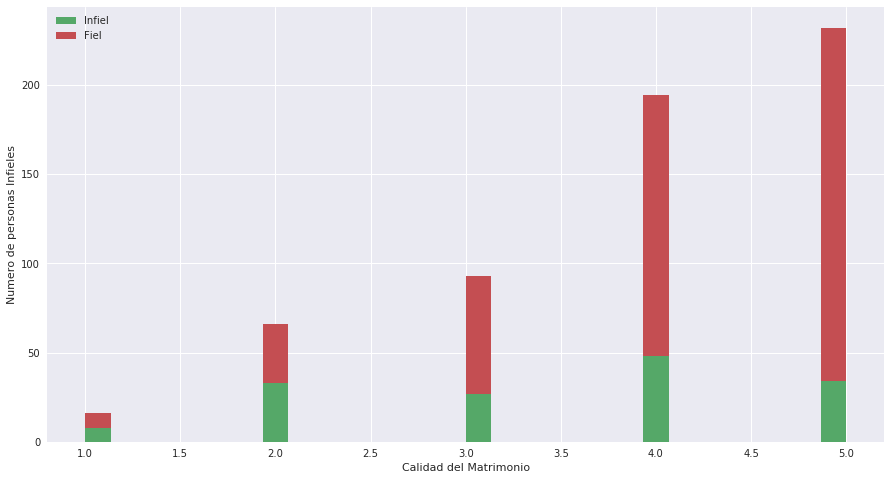

In [14]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Infidelidades']==1]['Calidad del Matrimonio'],df[df['Infidelidades']==0]['Calidad del Matrimonio']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.xlabel('Calidad del Matrimonio')
plt.ylabel('Numero de personas Infieles')
plt.legend()

En la calidad del matrimonio se observa un grafico interesante, pero dificil de evaluar, ya que con menor calidad las personas infieles representan aproximadamente un 50%, pero es muy pequeña la muestra, el otro punto importante que a pesar de que hay muchas personas en la clasificacion 4 y 5 (4 es la mayor cantidad de personas infieles representadas en la muestra) el punto 2.0 es uno de los que concentran mayor personas infieles con una baja muestra de personas dentro de esa calificacion.

Queremos destacar que es dificil comparar con exactitud el espectro de cada feature, porque logicamente mientras mas personas estan posicionadas en un punto del espectro, mayor cantidad de personas infieles y no infieles estaran concentradas en ese punto, sin embargo hay casos en los que no ocurre asi en forma clara.

## Modelos Predictivos

Creamos los arreglos para los datos de entrenamiento y la funcion que entrena dicho modelo (el escalamiento es proporcionado por la funcion StandardScaler()

In [15]:
X = np.array(df.drop('Infidelidades', axis=1))
X = StandardScaler().fit_transform(X)
y = np.array(df['Infidelidades'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

def accuracy(model):
    kf = KFold(n_splits=5)
    crv = cross_val_score(model, X_train, y_train, cv=kf,scoring='accuracy')
   
    return crv.mean()*100

Comparamos la presicion de 3 modelos disntintos

In [16]:
accuracy(LogisticRegression())

76.22222222222221

In [17]:
accuracy(RandomForestClassifier())

72.22222222222223

In [18]:
accuracy(DecisionTreeClassifier())

68.22222222222223

Vemos que el modelo mas certero es Logistic Regression, deerminamos la mejor ponderacion

In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
C = clf.feature_importances_
for i in range(len((C))):
    print(df.columns[i], ': ', C[i]*100)

('Infidelidades', ': ', 2.8398860325374717)
('Genero', ': ', 18.54176448629582)
('Edad', ': ', 11.904780479980557)
('Anos casado', ': ', 3.184326904003454)
('Hijos del matrimonio', ': ', 12.511969020335362)
('Religiosidad', ': ', 14.351738600953057)
('Educacion', ': ', 19.63733932732551)
('Ocupacion', ': ', 17.028195148568766)


Queremos destacar que nos ocurrio un error con el modelo de SVM, por eso no lo consideramos dentro de los modelos predictivos. sin embargo lo que hicimos fue comparar la exactitud de los 3 modelos que usamos con una matriz que determina la veracidad de los datos, teniendo las variables, verdadero positivo, verdadero nogativo, falso positivo y falso negativo.
Ademas el valor de prediccion de la cantidad de personas que pueden ser infiel con los datos de entrenamiento utilizados

In [20]:
clf = LogisticRegression() #SVC(kernel='linear', C=0.1)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)*100
print(np.mean(clf.predict(X_test))*100)

7.9470198675496695


In [21]:
con =confusion_matrix(y_test, clf.predict(X_test))
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.93      0.83       112
          1       0.33      0.10      0.16        39

avg / total       0.64      0.72      0.66       151



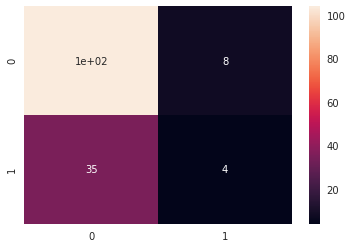

In [22]:
sns.heatmap(con, annot=True, xticklabels=[0,1], yticklabels=[0,1])

In [23]:
clf1 = RandomForestClassifier() 
clf1.fit(X_train,y_train)
clf1.score(X_test, y_test)*100
print(np.mean(clf1.predict(X_test))*100)

9.933774834437086


In [24]:
con1 =confusion_matrix(y_test, clf1.predict(X_test))
print(classification_report(y_test, clf1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.74      0.90      0.81       112
          1       0.27      0.10      0.15        39

avg / total       0.62      0.70      0.64       151



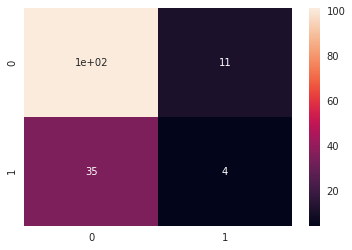

In [25]:
sns.heatmap(con1, annot=True, xticklabels=[0,1], yticklabels=[0,1])

In [26]:
clf2 = DecisionTreeClassifier() 
clf2.fit(X_train,y_train)
clf2.score(X_test, y_test)*100
print(np.mean(clf2.predict(X_test))*100)

24.503311258278146


In [27]:
con2 =confusion_matrix(y_test, clf2.predict(X_test))
print(classification_report(y_test, clf2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.76      0.75       112
          1       0.27      0.26      0.26        39

avg / total       0.62      0.63      0.63       151



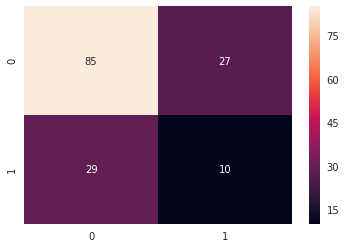

In [28]:
sns.heatmap(con2, annot=True, xticklabels=[0,1], yticklabels=[0,1])

El menor numero de personas infieles representando aprox 4% usando el modelo Logistic Regression con una exactitud del 76%, por otro lado el modelo Decision Tree Classifier da el mayor porcentaje de personas infieles representadno un 27% con una exactitud del 68% aproximadamente

## Conclusiones

S puede concluir que la relacion en que una persona sea infiel es variada, sin embargo notamos que el factor mas influyente es la calidad del matrimonio, donde concluimos que mientras mejor calidad sea el matrimonio menos probable que una persona sea infiel. Por otro lado el factor mas influyente a que una persona sea infiel, es si tienen hijos dentro del matrimonio, donde se observa que si hay hijos dentro del matrimonio es mas probable que la persona sea infiel, no tenemos las herramientas mas pertinetes a la mano para dar una razon, pero podria ser por estres y diferentes factores que pueden o unir, o desagregar una relacion. Y por ultimo cabe mencionar que los hombres son mas infieles que las mujeres, no es el primer estudio que anuncia este resultado aunque no es el factor mas influyente, como se sabe depende de cada persona y de cada situacion vivida en una relacion de pareja.